## MLP with TensorFlow 2.0
The objective of the exercise is to implement computational graphs in TensorFlow 2.0 to train and use such an architecture. The constraints we put ourselves is to use **low-level** functions of TensorFlow, i.e. we will not use high-level functions to compose layers and to train the parameters.

If you get this error in the execution of the first cell: ` ModuleNotFoundError: No module named 'tensorflow' `, it probably means TensorFlow 2.0 is not installed yet on your machine.

In [78]:
#############################
# MNIST Dataset Preparation #
#############################

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(x_train, y_train_vec),(x_test, y_test_vec) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train_vec, 10, dtype='float64')
y_test = tf.keras.utils.to_categorical(y_test_vec, 10, dtype='float64')
N = x_train.shape[0]         # number of samples
D = x_train.shape[1]         # dimension of input sample
n_classes = y_train.shape[1] # output dim
print('MNIST data set ready. N={}, D={}, n_classes={}'.format(N,D,n_classes))

MNIST data set ready. N=60000, D=784, n_classes=10


In [17]:
# Function to sample a random batch from dataset
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0,len(data))  # create an array of index values
    np.random.shuffle(idx)        # shuffle it
    idx = idx[:num]               # take the first n indexes = size of batch
    data_shuffle = data[idx]      # extract the batch using the random indexes
    labels_shuffle = labels[idx]  # extract the labels using the random indexes

    return data_shuffle, labels_shuffle

In [31]:
##################
# Training phase #
##################

E = 50                # number of epochs
B = 128               # batch size
N = x_train.shape[0]  # number of samples
D = x_train.shape[1]  # dimension of input sample
H = 300               # number of neurons
A = 0.01              # learning rate alpha

##############################################
#  COMPLETE CODE BELOW WHERE YOU SEE # ...   #
##############################################

# Build the computational graph
@tf.function # this decorator tells tf that a graph is defined
def mlp_train(x, y, alpha):
    # define nodes for forward computation for hidden neurons h and output neurons y_pred
    # h = ...  output of first layer after ReLu activation
    #h = tf.nn.relu(tf.matmul(x, w1)+b1)
    h = tf.maximum(tf.matmul(x, w1) + b1, 0.0)
    # y_pred = ... output of second layer after sigmoid activation
    #y_pred = tf.maximum((tf.matmul(h,w2)+b2),0)
    y_pred = tf.sigmoid(tf.matmul(h, w2) + b2)
    # define nodes for forward computation for hidden neurons h and output neurons y_pred
    #print("y: ", y)
    #print("y_pred: ", y_pred)
    diff = y_pred - y
    loss = tf.reduce_mean(tf.pow(diff,2))
    
    # define the gradients
    grad_w1, grad_b1, grad_w2, grad_b2 = tf.gradients(ys=loss, xs=[w1,b1,w2,b2])
    
    # compute the new values of the gradients with the assign method (see slides)
    w1.assign(w1 - alpha * grad_w1)
    b1.assign(b1 - alpha * grad_b1)
    w2.assign(w2 - alpha * grad_w2)
    b2.assign(b2 - alpha * grad_b2)
    return y_pred, loss

# Init the tf.Variablesw 1, b1, w2, b2 following the given examples
w1 = tf.Variable(tf.random.truncated_normal((D, H), stddev = 0.1, dtype='float64'))
b1 = tf.Variable(tf.constant(0.0, shape=[H], dtype='float64'))
w2 = tf.Variable(tf.random.truncated_normal((H, n_classes), stddev = 0.1, dtype='float64'))
b2 = tf.Variable(tf.constant(0.0, shape=[n_classes], dtype='float64'))

# Run the computational graph
J = [] # to store the evolution of loss J for each epoch
for epoch in range(E):
    J_epoch = 0.0
    for _ in range(int(N/B)): # number of batches to visit for 1 epoch
        # get batches calling the next_batch method provided above
        x_train_batch, y_train_batch = next_batch(B,x_train, y_train)
        #print("y_train_batch: ", y_train_batch)
        with tf.device('/CPU:0'):  # change to /GPU:0 to move it to GPU
            # call the graph with the batched input, target and alpha A
             out = mlp_train(x_train_batch, y_train_batch, A)
        y_pred, loss_val = out
        J_epoch += loss_val
    J.append(J_epoch)
    print("epoch = {}, loss = {}".format(epoch, J_epoch))

epoch = 0, loss = 62.542483826686116
epoch = 1, loss = 42.34177834297284
epoch = 2, loss = 39.98567622183784
epoch = 3, loss = 37.79961421185011
epoch = 4, loss = 35.5804264912843
epoch = 5, loss = 33.382771412676206
epoch = 6, loss = 31.529795983242096
epoch = 7, loss = 29.84731349508578
epoch = 8, loss = 28.238855662441352
epoch = 9, loss = 27.00505203415931
epoch = 10, loss = 25.926485703581413
epoch = 11, loss = 24.741335187794466
epoch = 12, loss = 23.94889358484248
epoch = 13, loss = 23.18306033685146
epoch = 14, loss = 22.25860311969975
epoch = 15, loss = 21.768236214154435
epoch = 16, loss = 20.934457637049427
epoch = 17, loss = 20.371873180590136
epoch = 18, loss = 19.761222030771144
epoch = 19, loss = 19.264373631080467
epoch = 20, loss = 19.029461214897502
epoch = 21, loss = 18.33537524219486
epoch = 22, loss = 17.992260555207146
epoch = 23, loss = 17.688094649129685
epoch = 24, loss = 17.18891697487546
epoch = 25, loss = 16.917623078419282
epoch = 26, loss = 16.652687692530

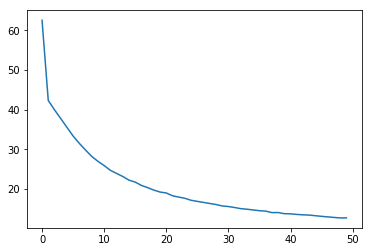

In [32]:
# Plot the evolution of the loss
plt.plot(J)

In [33]:
#################
# Testing phase #
#################

N = x_test.shape[0]  # number of samples
D = x_test.shape[1]  # dimension of input sample

##############################################
#  COMPLETE CODE BELOW WHERE YOU SEE # ...   #
##############################################
# Build the computational graph
@tf.function # this decorator tells tf that a graph is defined
def mlp_test(x, y):
    #h = tf.nn.relu(tf.matmul(x, w1)+b1)
    #y_pred = tf.maximum((tf.matmul(h,w2)+b2),0)
    h = tf.maximum(tf.matmul(x, w1) + b1, 0.0)
    y_pred = tf.sigmoid(tf.matmul(h, w2) + b2)
    return y_pred

# Run the computational graph
with tf.device('/CPU:0'):  # change to /GPU:0 to move it to GPU
    y_pred_test = mlp_test(x_test, y_test)

print('Forward pass on test set done.')
# At this stage, y_pred_test should contain the matrix of outputs on the test set with shape (N_test, 10)

Forward pass on test set done.


In [34]:
# compute accuracy
y_winner = np.argmax(y_pred_test, axis=1)
N_test = y_winner.size
num_correct = (y_winner == y_test_vec).sum()
num_missed = N_test - num_correct
accuracy = num_correct * 1.0 / N_test
error_rate = num_missed * 1.0 / N_test
print('# samples  : ', N_test)
print('# correct  : ', num_correct)
print('# missed   : ', num_missed)
print('accuracy   :  %2.2f %%'% (accuracy*100.0))
print('error rate :  %2.2f %%'% (error_rate*100.0))

# samples  :  10000
# correct  :  8822
# missed   :  1178
accuracy   :  88.22 %
error rate :  11.78 %


# Exercise 4

In [102]:
import tensorflow as tf

In [103]:
#############################
# MNIST Dataset Preparation #
#############################

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(x_train, y_train_vec),(x_test, y_test_vec) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train_vec, 10, dtype='float64')
y_test = tf.keras.utils.to_categorical(y_test_vec, 10, dtype='float64')
N = x_train.shape[0]         # number of samples
D = x_train.shape[1]         # dimension of input sample
n_classes = y_train.shape[1] # output dim
print('MNIST data set ready. N={}, D={}, n_classes={}'.format(N,D,n_classes))

MNIST data set ready. N=60000, D=784, n_classes=10


In [104]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(300, input_shape=(D,), use_bias=True, activation='relu'))
model.add(tf.keras.layers.Dense(10, input_shape=(D,), use_bias=True, activation='sigmoid'))

In [105]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_21 (Dense)             (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


In [106]:
sgd = tf.keras.optimizers.SGD(learning_rate=A)
model.compile(optimizers=sgd, loss='mse', metrics=['accuracy'])

In [107]:
#history1 = model.fit(x_train, y_train, epochs = E)

In [108]:
history = model.fit(x_train,y_train,epochs=E,verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0125 - accuracy: 0.9306 - val_loss: 0.0071 - val_accuracy: 0.9611
Epoch 2/50
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0055 - accuracy: 0.9694 - val_loss: 0.0048 - val_accuracy: 0.9737
Epoch 3/50
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0041 - accuracy: 0.9783 - val_loss: 0.0043 - val_accuracy: 0.9761
Epoch 4/50
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0033 - accuracy: 0.9823 - val_loss: 0.0043 - val_accuracy: 0.9764
Epoch 5/50
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0028 - accuracy: 0.9852 - val_loss: 0.0038 - val_accuracy: 0.9794
Epoch 6/50
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0024 - accuracy: 0.9872 - val_loss: 0.0037 - val_accuracy: 0.9809
Epoch 7/50
60000/60000 [==============================] 

In [109]:
model.evaluate(x_test, y_test, verbose=2)

10000/1 - 0s - loss: 0.0018 - accuracy: 0.9828


[0.0035325256125644743, 0.9828]

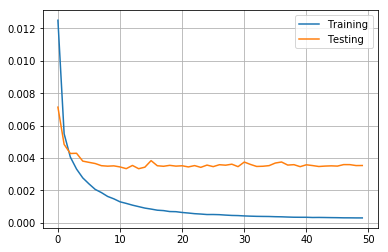

In [110]:
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Testing')
plt.legend()
plt.grid()

## Comparison
- Accuracy Exercise 3 = 88.22 %
- Accuracy Exercise 4 = 98.28 %